<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Banking%20Dataset%20Analysis%20and%20Classification/bank_eda_starting_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# @title Read data

train = pd.read_csv('Train-Set.csv')
test = pd.read_csv('Test-Set.csv')

In [ ]:
print(train.shape)
print(test.shape)

(54712, 19)
(23449, 18)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [ ]:
train.head(3)

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no


In [ ]:
train.tail(3)

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no
54711,68268,27312,51,retired,married,basic.4y,no,NaN,no,no,cellular,jul,wed,1057,1,13,1,success,no


In [ ]:
data=train.drop(columns=['id','Unnamed: 0'])

data.describe()

,age,balance,duration,campaign,pdays,previous
count,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


In [ ]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features.describe(include='all')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,Target
count,54712,54712,54712,54712,54712,54712,54712,54712,54712,54712,54712
unique,12,4,11,3,3,3,3,41,17,5,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,may,unknown,no
freq,12042,33095,16357,49368,29666,45564,35134,7636,9651,26057,48433


In [ ]:
# @title Print the counts of the training data without the first 2 columns
def counts(data):
    value_counts_dict = {}
    for col in data.columns:
        value_counts_dict[col] = data[col].value_counts()
    return value_counts_dict

value_counts = counts(data)

for col, counts in value_counts.items():
    print(f"Column: {col}")
    print(counts)
    print("\n")


Column: age
age
32    2525
31    2498
33    2384
34    2311
35    2303
      ... 
89       2
98       1
92       1
91       1
90       1
Name: count, Length: 79, dtype: int64


Column: job
job
blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: count, dtype: int64


Column: marital
marital
married     33095
single      15362
divorced     6209
unknown        46
Name: count, dtype: int64


Column: education
education
secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: count, dtype: int64


Colu

In [ ]:
train.duplicated().sum()


0

In [ ]:
train.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

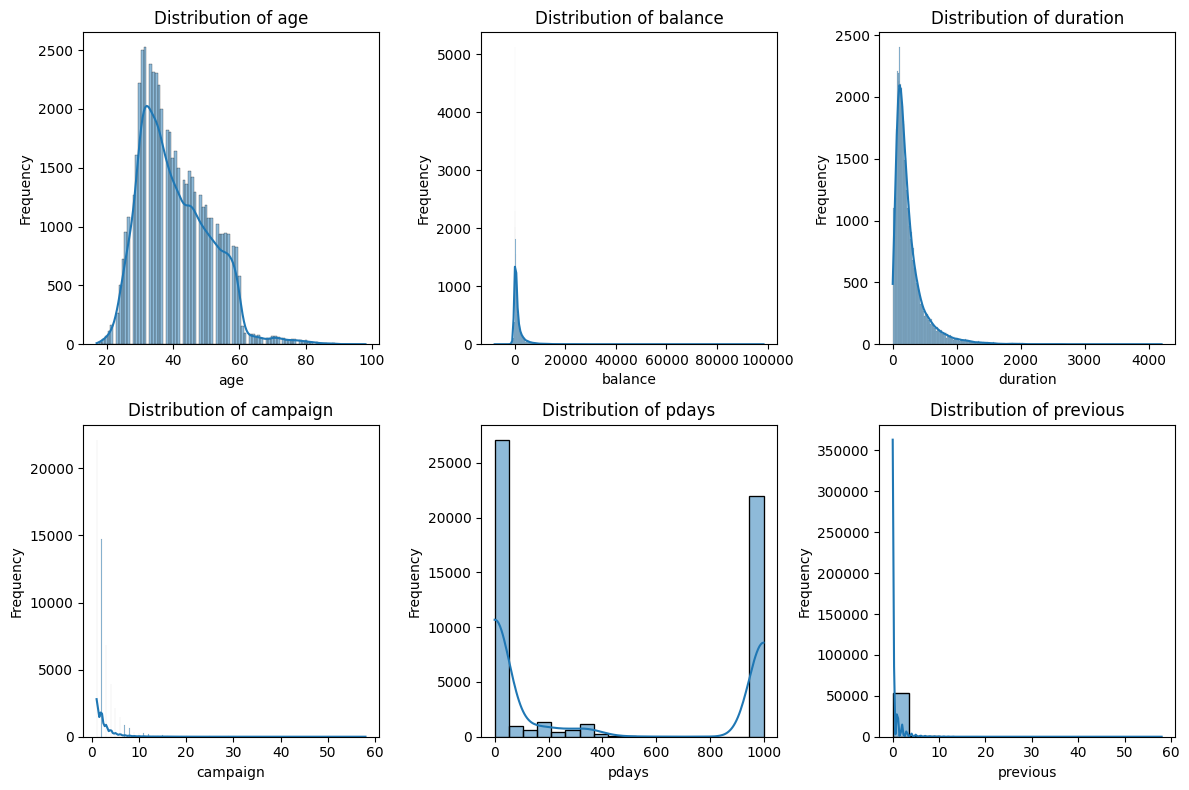

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go  # plotly ref https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Histogram.html
from plotly.subplots import make_subplots
import pandas as pd
from IPython.display import display, HTML

colors = ['burlywood', 'hotpink', 'olive',  'teal', 'orange', 'green', 'red']

for i, col in enumerate(numerical_features.columns):
    fig = go.Figure()

    # Plot the histogram of non-NaN values
    fig.add_trace(go.Histogram(x = data[col].dropna(), marker=dict(color=colors[i % len(colors)]), name='Non-NaN'))

    # Add a bar for NaN values
    num_nans = data[col].isna().sum()
    if num_nans > 0:
        fig.add_trace(go.Bar(

            x=[data[col].min() - 1],
            y=[num_nans],
            marker=dict(color='black'),
            width=[10],
            name=f'NaN (count={num_nans})'
        ))

    fig.update_layout(
        title=f"Distribution of {col} (including NaN values)",
        xaxis_title=col,
        yaxis_title='Count',
        bargap=0.2,
        xaxis=dict(tickangle=45),
        legend=dict(title='Legend'),
        width=800,
        height=400
    )

    # Summary statistics
    summary_stats = data[col].describe()
    summary_stats_html = summary_stats.to_frame().to_html()

    # Combine plot and summary statistics
    display(HTML(f"""
    <div style="display: flex; align-items: flex-start;">
        <div>{fig.to_html(full_html=False, include_plotlyjs='cdn')}</div>
        <div style="padding-left: 50px;">
            <h4>Summary Statistics for {col}</h4>
            {summary_stats_html}
            <p>Number of NaN values in {col}: {num_nans}</p>
        </div>
    </div>
    """))


,age
count,54712.000000
mean,40.580147
std,10.544504
min,17.000000
25%,32.000000
50%,39.000000
75%,48.000000
max,98.000000


,campaign
count,54712.000000
mean,2.679961
std,2.966822
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,58.000000


,pdays
count,54712.000000
mean,425.022829
std,476.813012
min,-1.000000
25%,-1.000000
50%,88.000000
75%,999.000000
max,999.000000


,previous
count,54712.000000
mean,0.407351
std,1.520253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58.000000


In [ ]:
from typing import List
import plotly.express as px

def bivariate_analysis(data, numerical_features, target_variable):
    for col in numerical_features:
        box_fig = px.box(data,
                         x=target_variable,
                         y=col,
                         title=f"{col} vs {target_variable}",
                         labels={col: col, target_variable: target_variable},
                         width=750,
                         height=600)

        box_fig.show()

bivariate_analysis(data, numerical_features, 'Target')

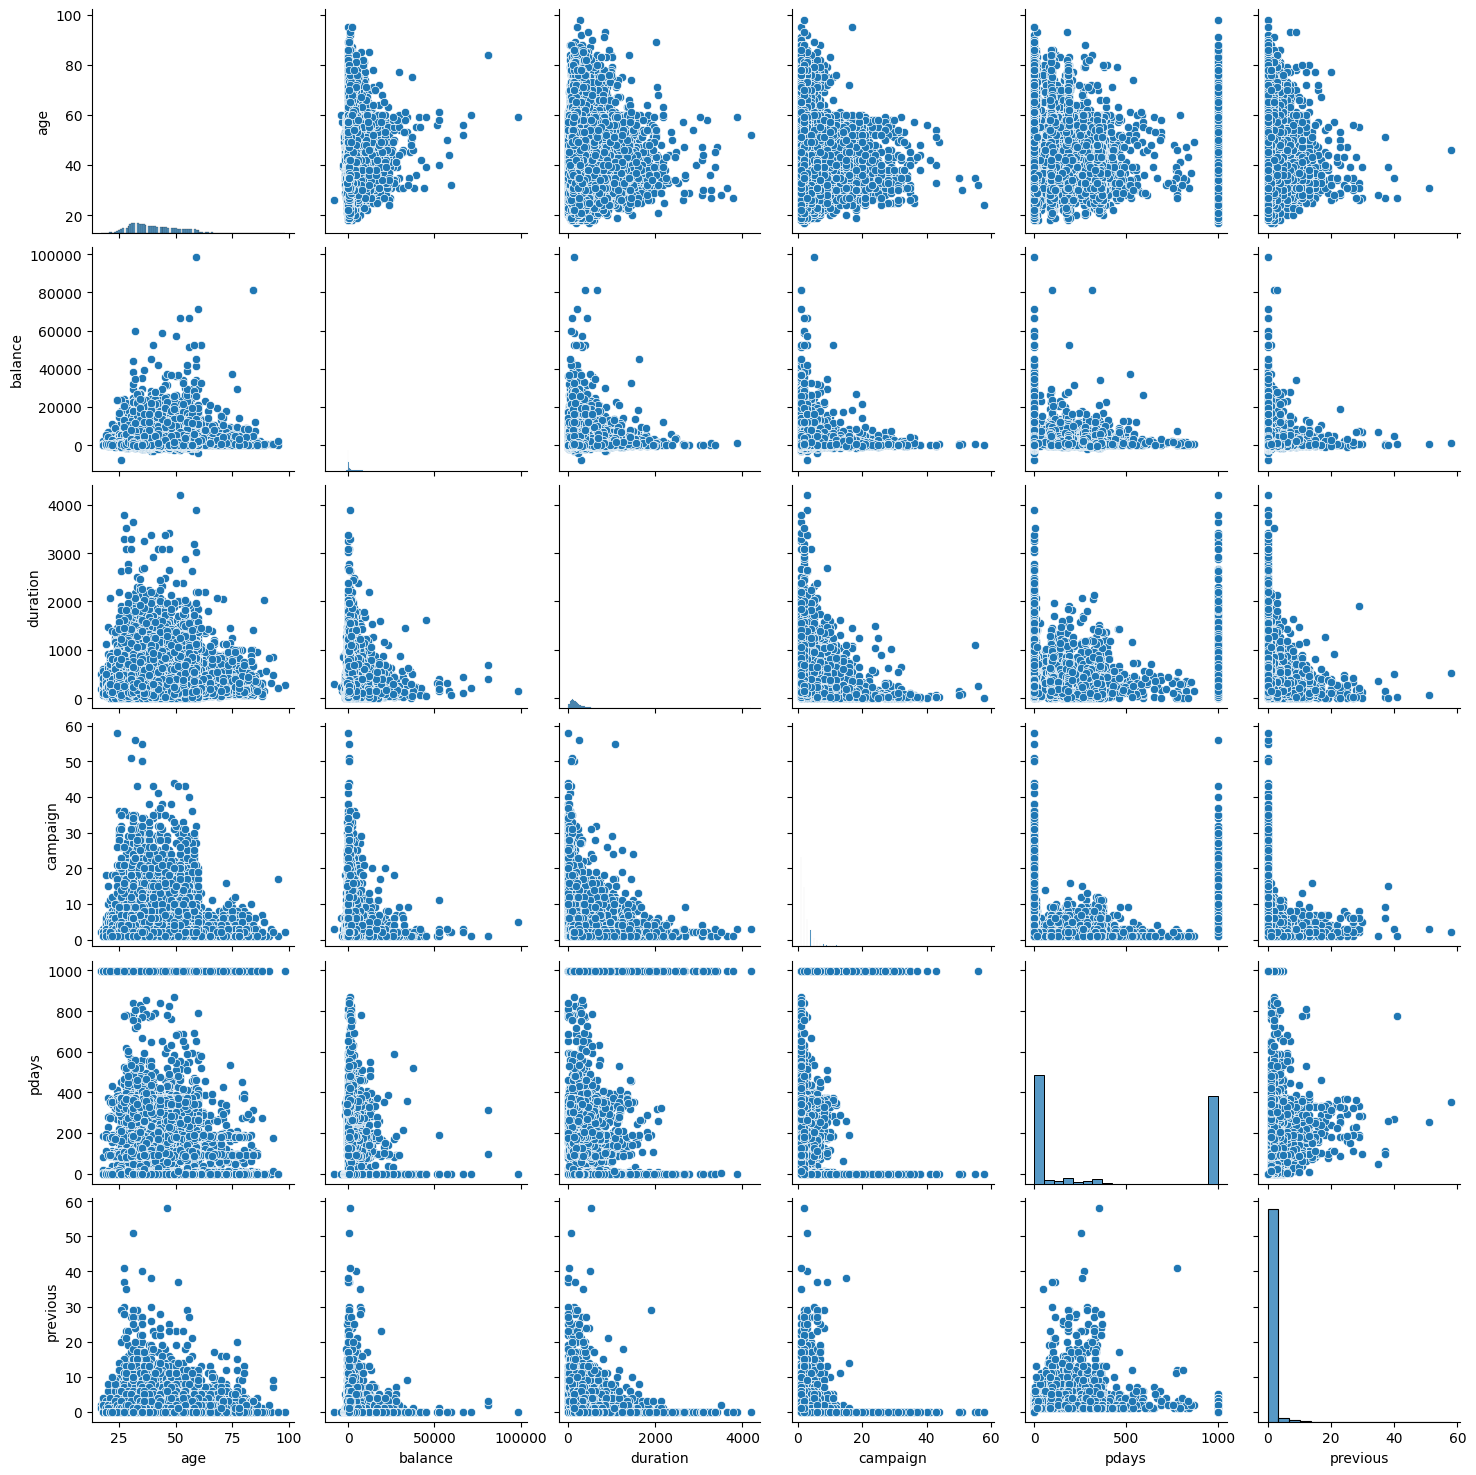


Checking for unique values in categorical columns:
job: 12 unique values
marital: 4 unique values
education: 11 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 3 unique values
day: 41 unique values
month: 17 unique values
poutcome: 5 unique values
Target: 2 unique values


In [ ]:
# Scatter plots to identify relationships between variables

sns.pairplot(data)

plt.show()


print("\nChecking for unique values in categorical columns:")

for col in data.select_dtypes(include=['object']).columns:

    print(f"{col}: {data[col].nunique()} unique values")

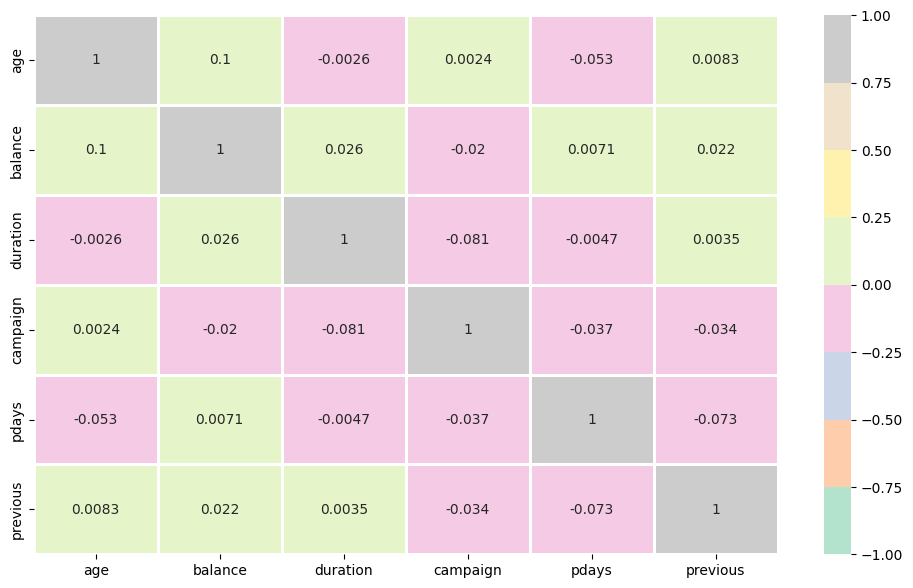

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(numerical_features.corr(), cmap='Pastel2',annot = True, vmin = -1, vmax = 1, linewidths=2)
plt.show()

In [ ]:
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'Target'],
      dtype='object')

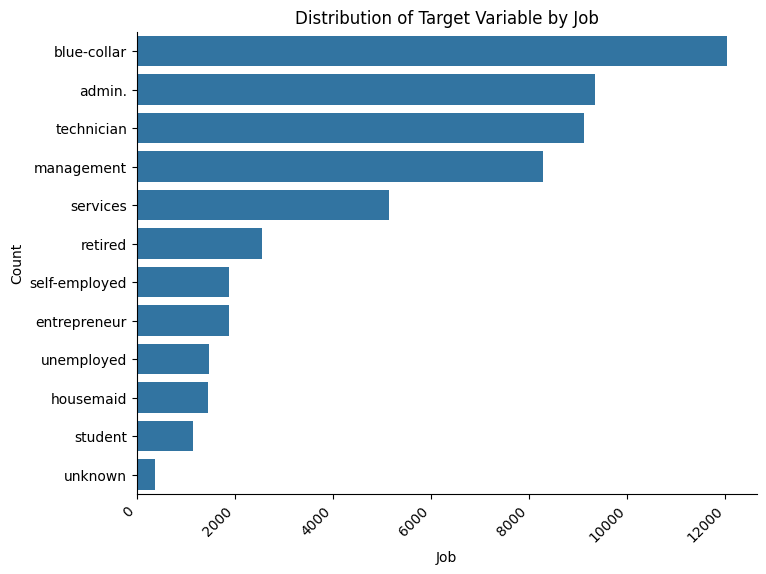

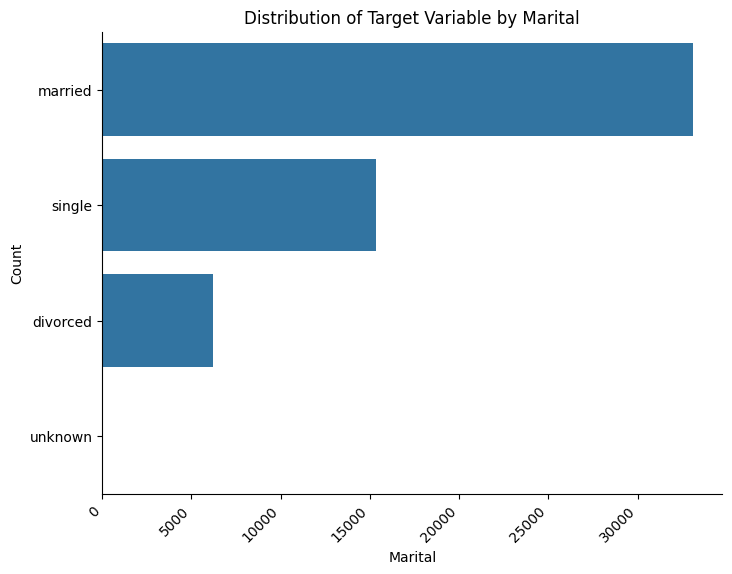

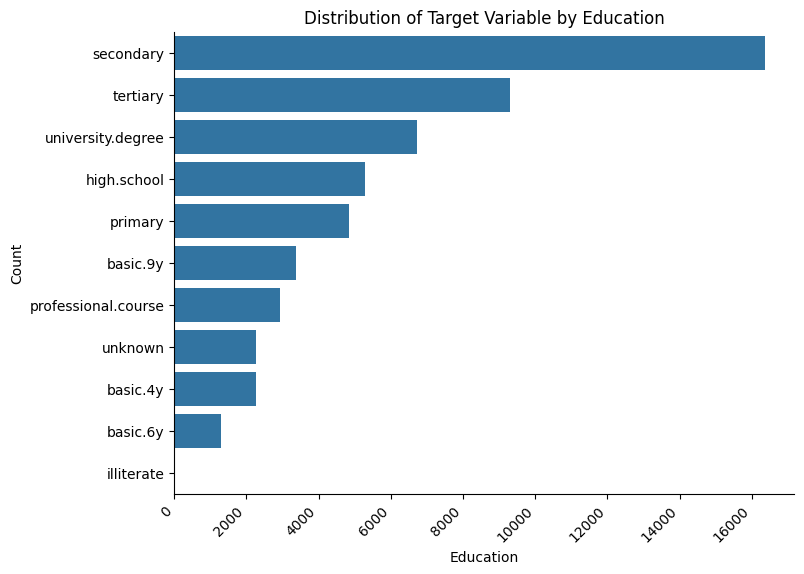

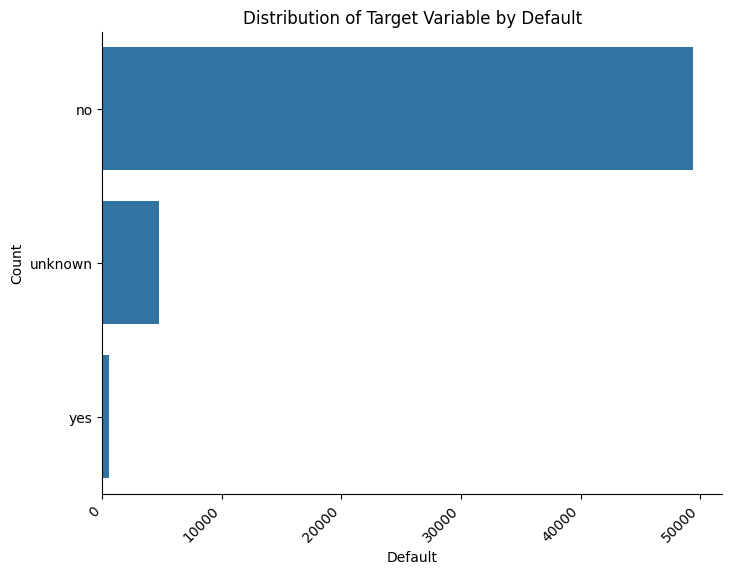

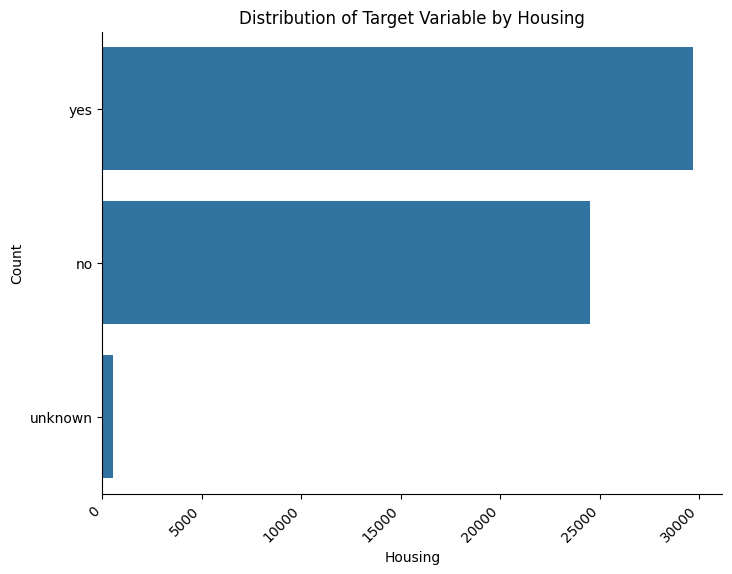

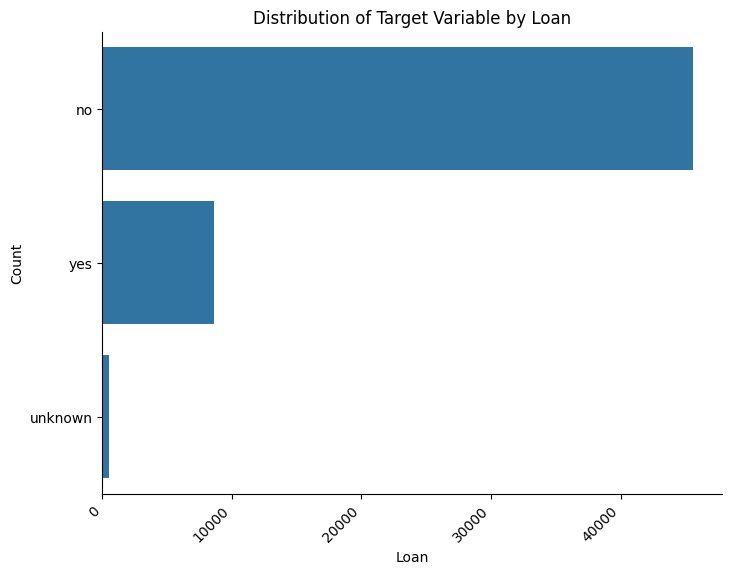

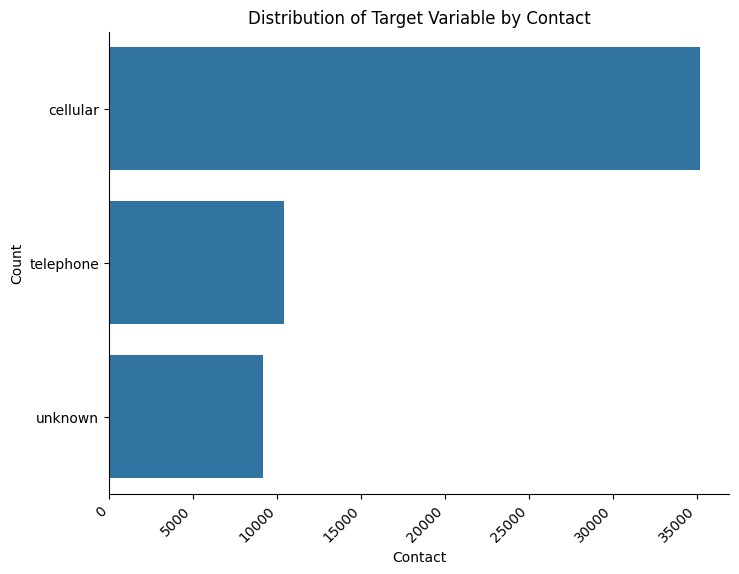

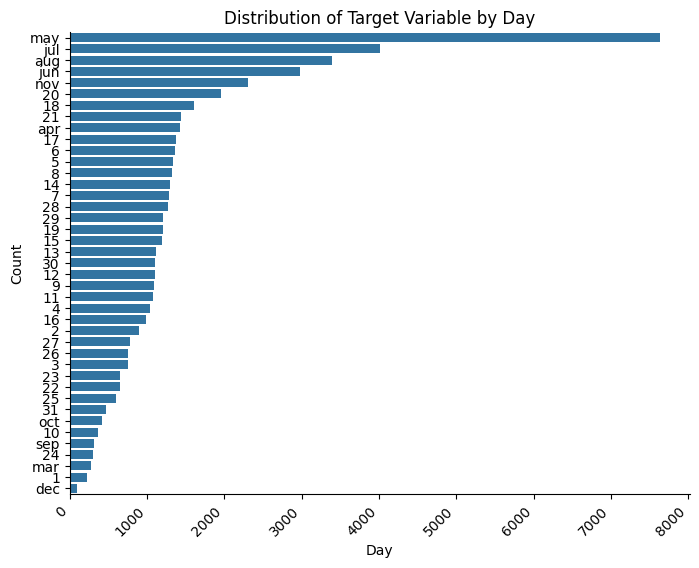

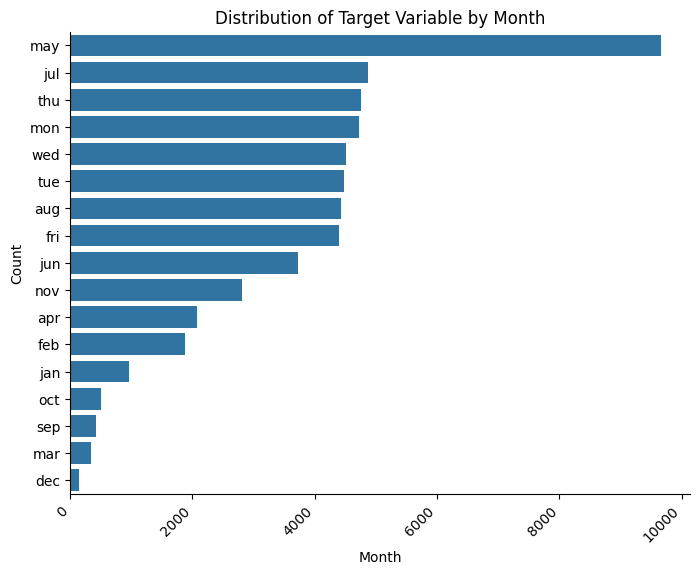

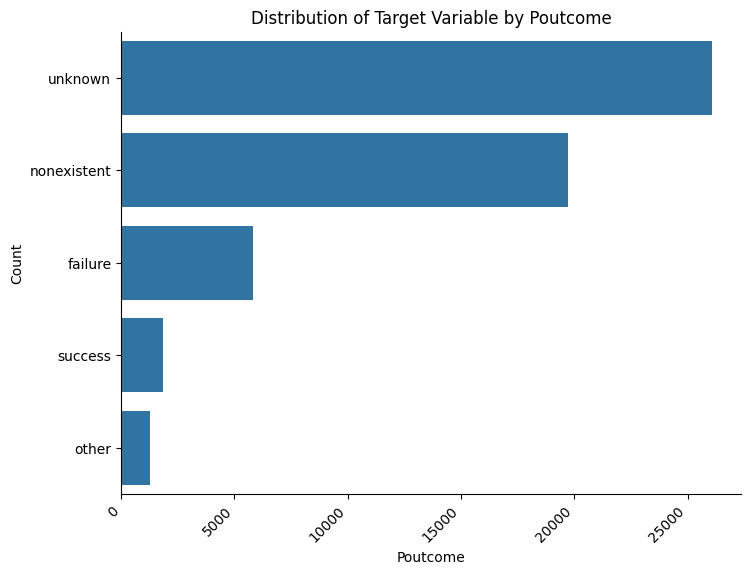

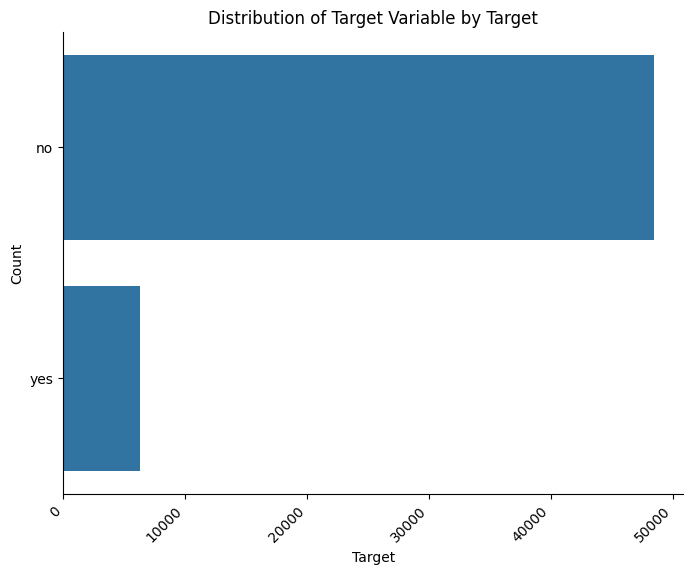

In [ ]:
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
#  sns.barplot(x=feature, y="size",data=train.groupby(feature).size().reset_index(name="size"))
  sns.countplot(data=train, y=feature, order = train[feature].value_counts().index)

  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.xlabel(feature.capitalize())
  plt.ylabel("Count")
  plt.title(f"Distribution of Target Variable by {feature.capitalize()}")
  plt.xticks(rotation=45, ha='right')
  plt.show()

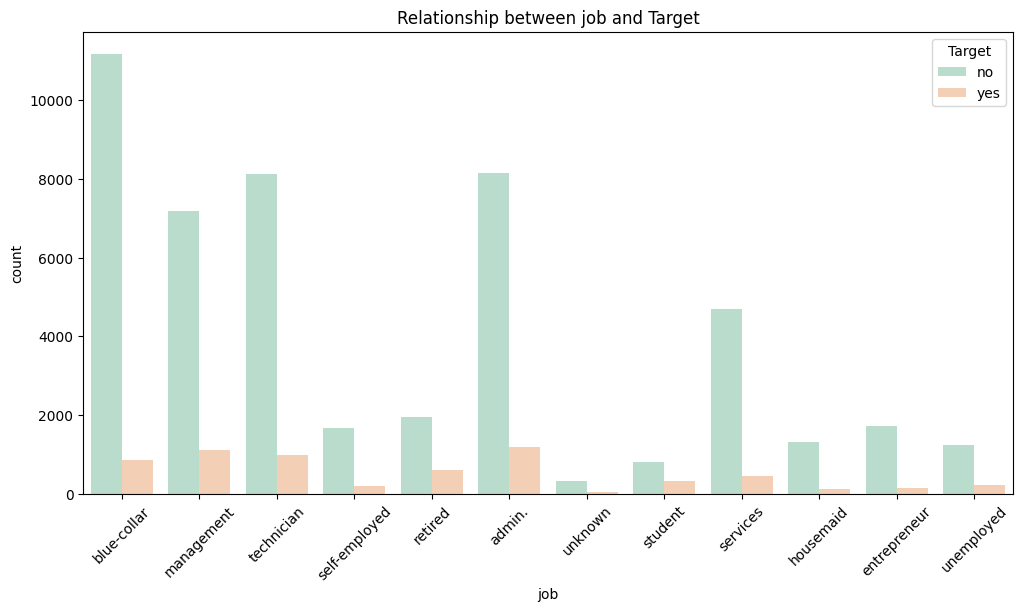

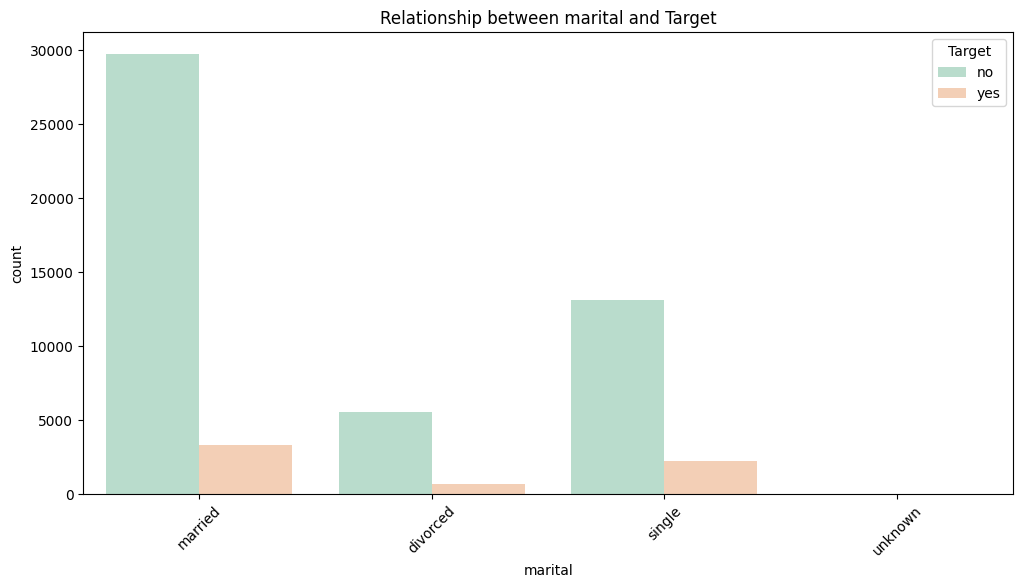

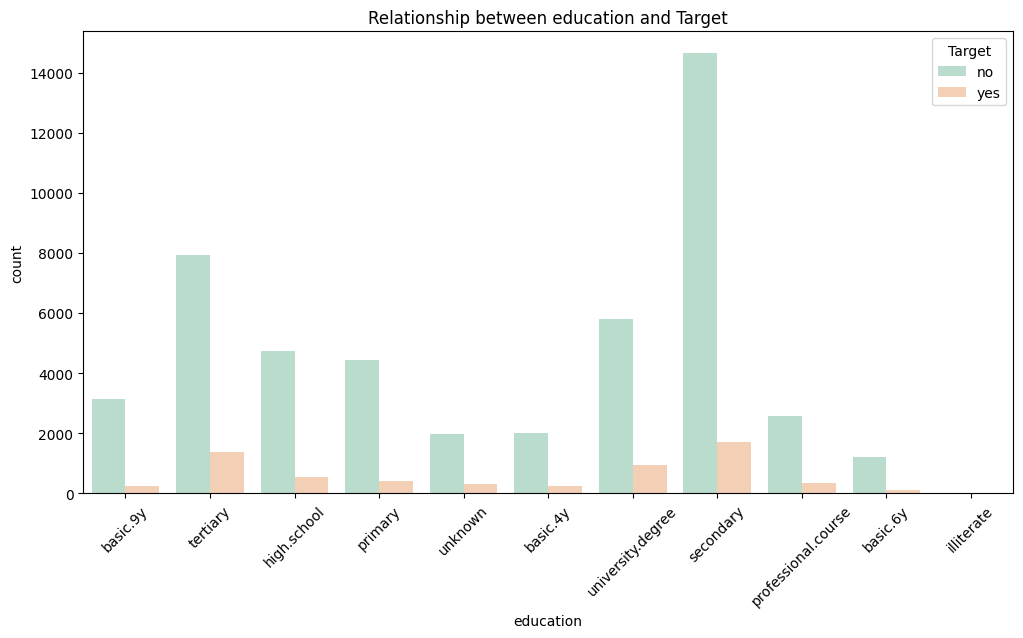

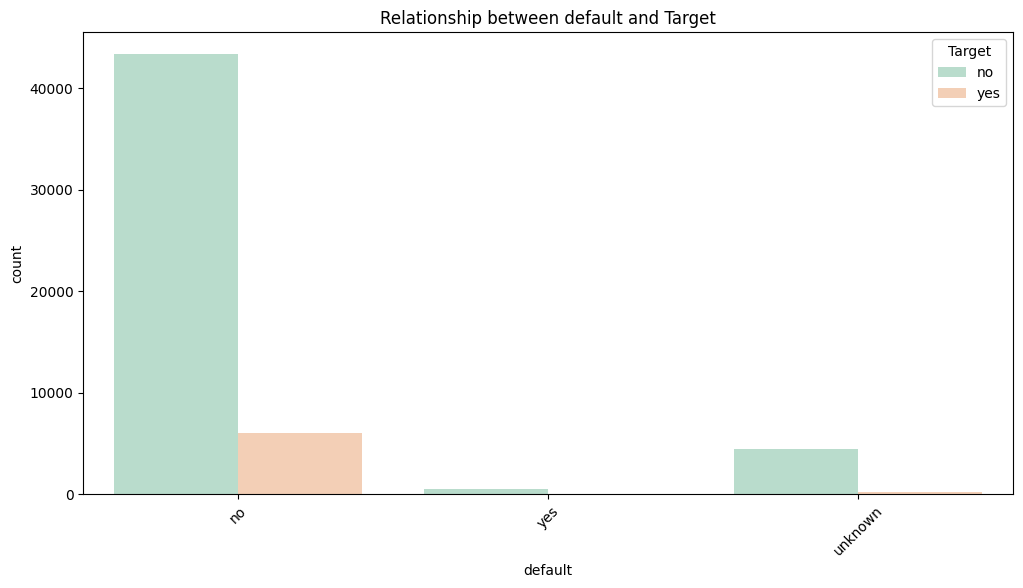

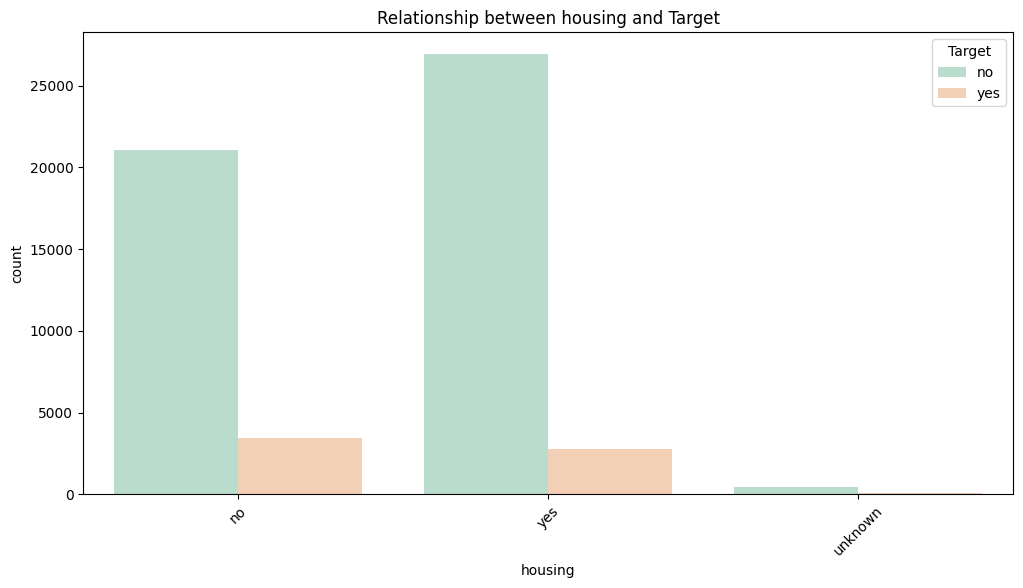

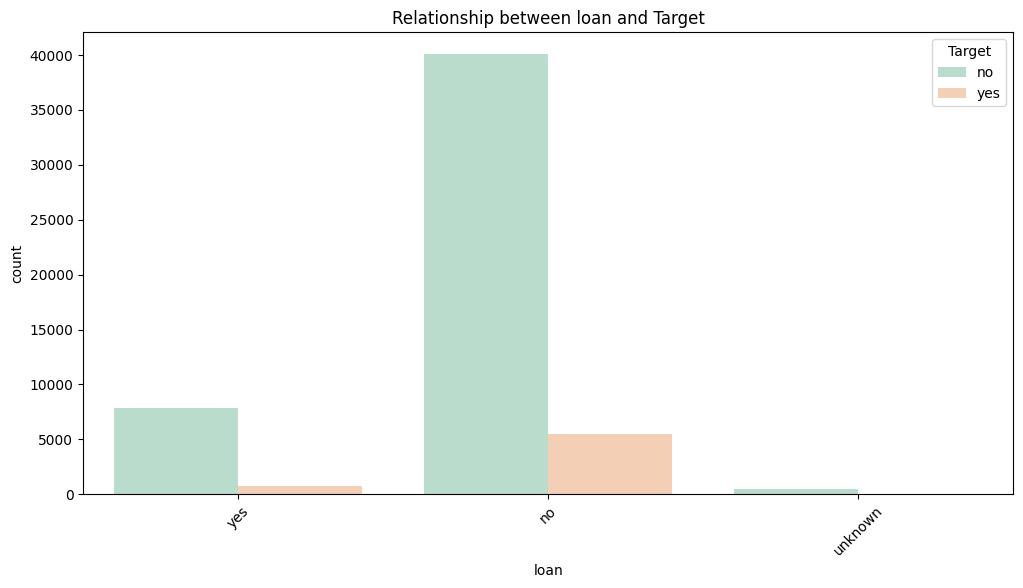

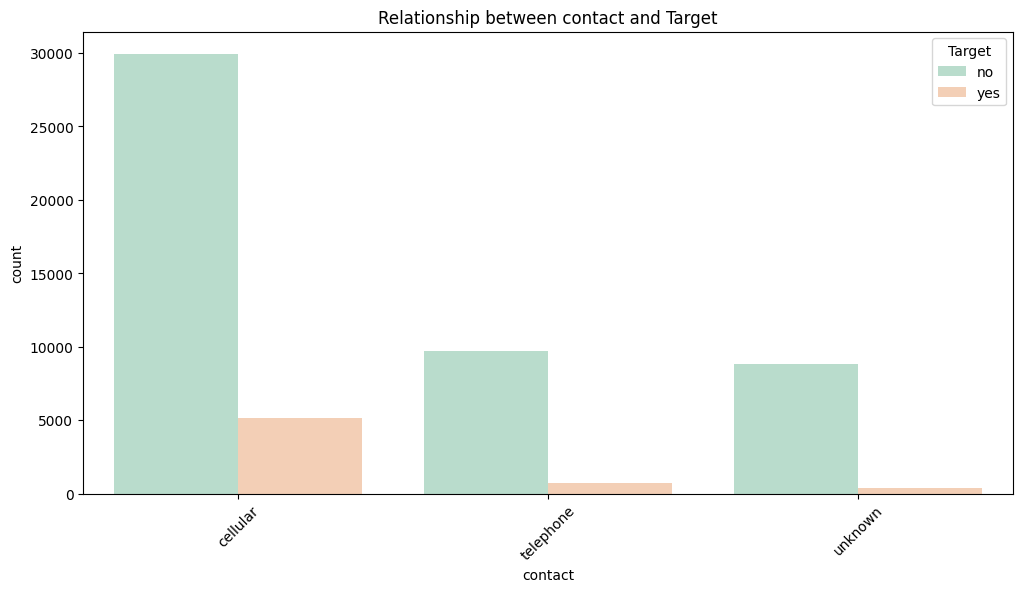

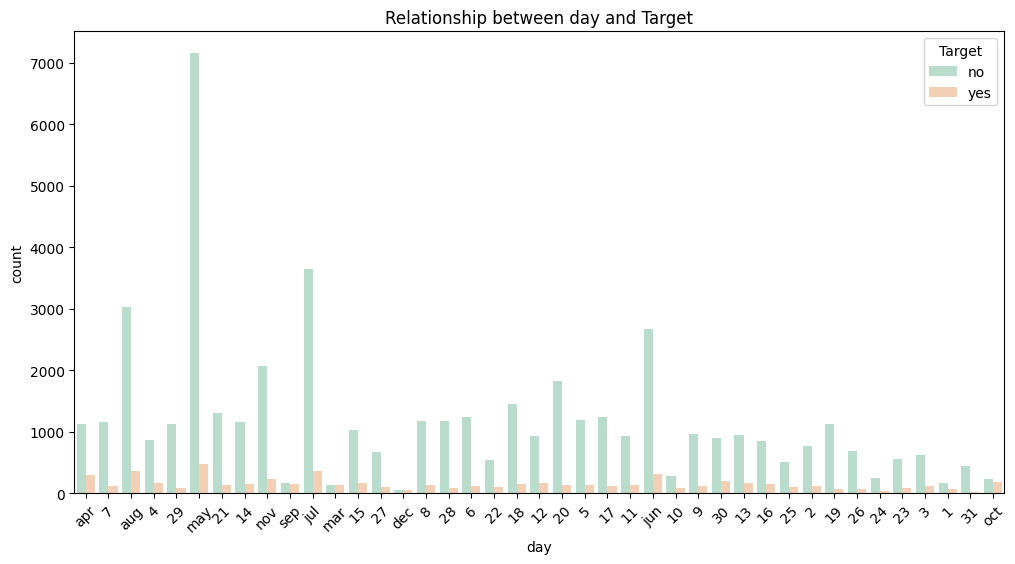

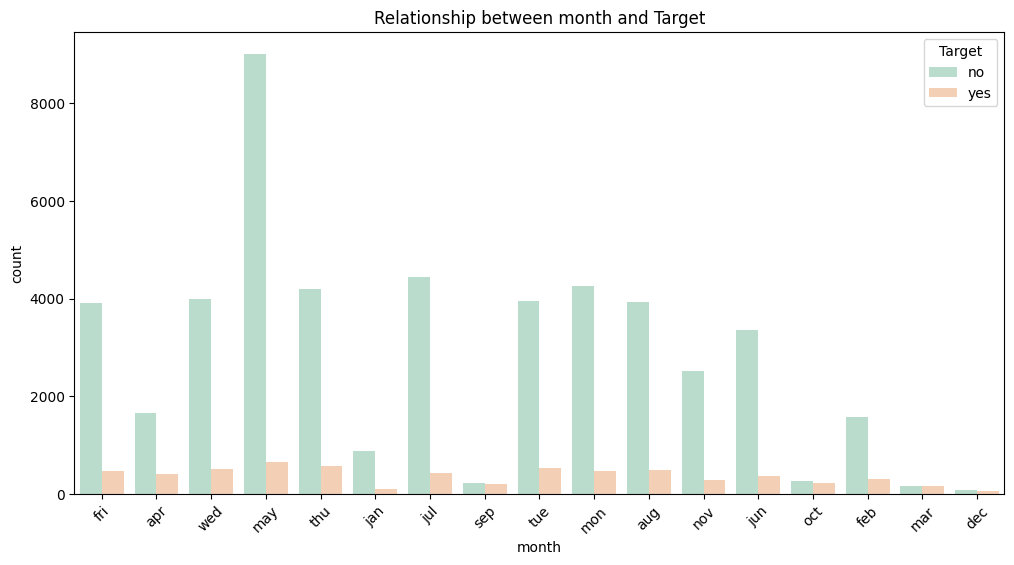

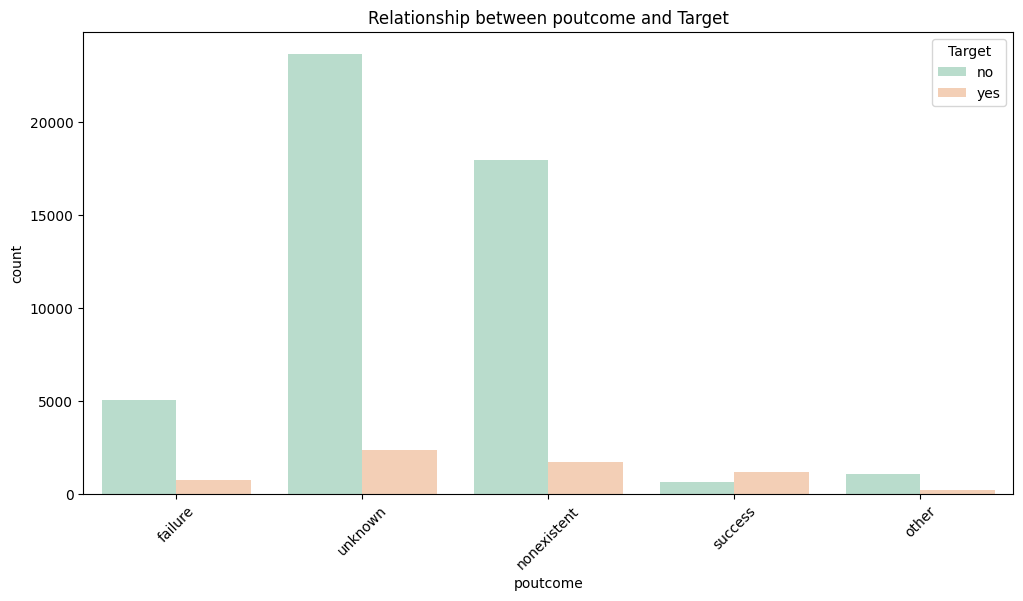

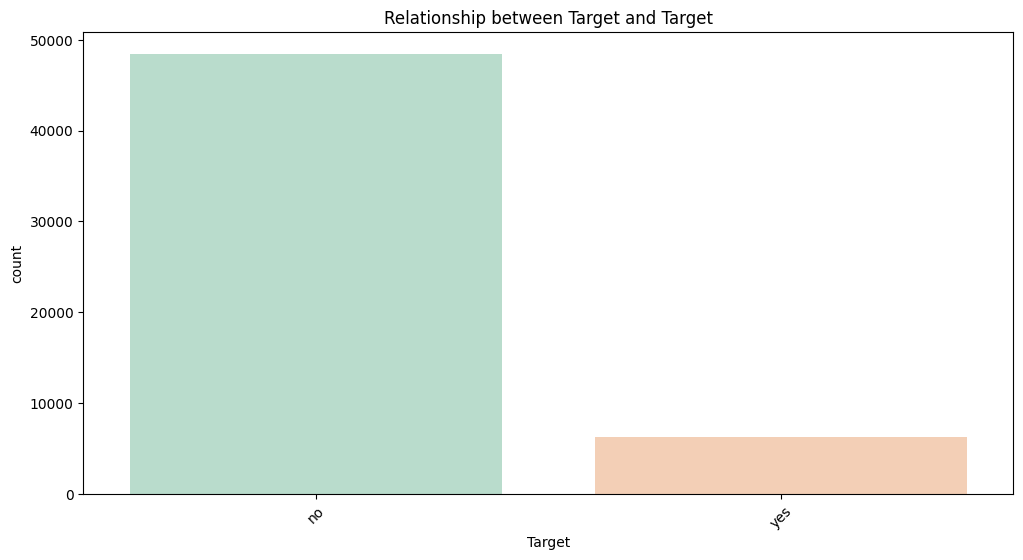

In [ ]:
# Relationship between categorical features and the target variable

for feature in categorical_features:

    plt.figure(figsize=(12, 6))

    sns.countplot(x=feature, hue='Target', data=train,palette='Pastel2')

    plt.title(f'Relationship between {feature} and Target')

    plt.xticks(rotation=45)

    plt.show()

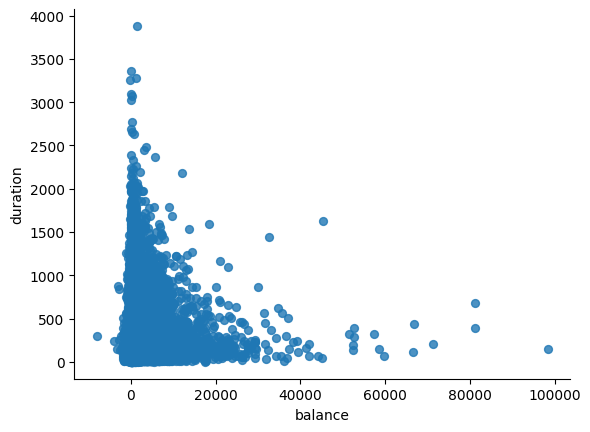

In [ ]:
# @title balance vs duration

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='balance', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data[data['balance'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
2,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
4,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes
6,39,admin.,married,basic.9y,no,NaN,yes,no,cellular,may,thu,279,1,999,0,nonexistent,no
9,34,unknown,divorced,basic.4y,no,NaN,no,no,cellular,nov,wed,73,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,53,self-employed,married,university.degree,no,NaN,yes,no,telephone,may,wed,382,10,999,0,nonexistent,no
54704,59,retired,single,high.school,no,NaN,yes,no,cellular,jul,thu,143,2,999,0,nonexistent,no
54705,27,technician,single,university.degree,no,NaN,yes,no,cellular,jul,mon,258,3,999,0,nonexistent,no
54708,31,services,married,high.school,no,NaN,no,no,telephone,may,wed,636,6,999,0,nonexistent,no


In [ ]:
data[data['balance'].isna()]['education'].value_counts()

education
university.degree      6741
high.school            5292
basic.9y               3380
professional.course    2925
basic.4y               2256
basic.6y               1306
unknown                 958
illiterate               12
Name: count, dtype: int64

In [ ]:
data[data['balance'].isna()]['job'].value_counts()

job
admin.           5731
blue-collar      5178
technician       3737
services         2231
management       1634
retired           946
entrepreneur      824
self-employed     771
housemaid         585
unemployed        559
student           490
unknown           184
Name: count, dtype: int64

In [ ]:
data[data['balance'].isna()]['Target'].value_counts()

Target
no     20298
yes     2572
Name: count, dtype: int64

In [ ]:
train['loan'] = train['loan'].map({'yes' : 1, 'no': 0})
train['housing'] = train['housing'].map({'yes' : 1, 'no': 0})
train['default'] = train['default'].map({'yes' : 1, 'no': 0})
train['Target'] = train['Target'].map({'yes' : 1, 'no': 0})


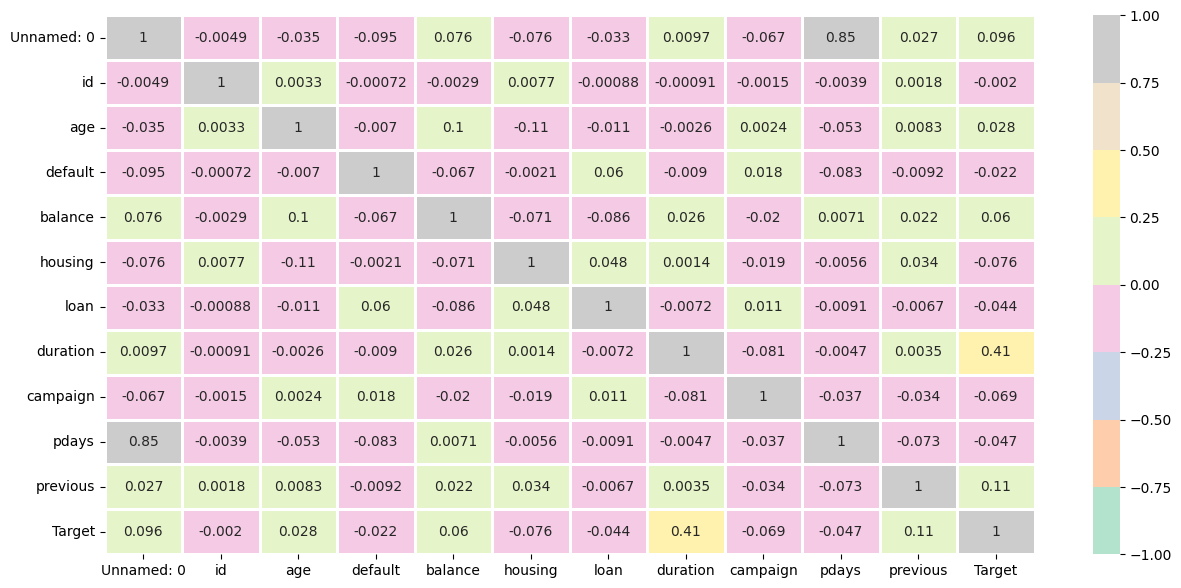

In [ ]:
plt.figure(figsize=(15, 7))

sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr(), cmap='Pastel2',annot = True, vmin = -1, vmax = 1, linewidths=2)
plt.show()

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

for feature in (categorical_features):
  contingency_table = pd.crosstab(train[feature], train['Target'])
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
  print(f"Feature: {feature}")
  print(f"Chi-squared: {chi2}")
  print(f"P-value: {p}")
  print("\n" + "-"*40 + "\n")


Feature: job
Chi-squared: 1095.9543714153845
P-value: 4.223582566185017e-228

----------------------------------------

Feature: marital
Chi-squared: 213.94614453492363
P-value: 4.085951208349335e-46

----------------------------------------

Feature: education
Chi-squared: 281.93889914701634
P-value: 1.0149502952913313e-54

----------------------------------------

Feature: default
Chi-squared: 22.97470725910809
P-value: 1.6414687699547647e-06

----------------------------------------

Feature: housing
Chi-squared: 309.19532002123776
P-value: 3.2697875180095806e-69

----------------------------------------

Feature: loan
Chi-squared: 103.03509432923565
P-value: 3.292635771824825e-24

----------------------------------------

Feature: contact
Chi-squared: 1059.5557224426793
P-value: 8.325268272605092e-231

----------------------------------------

Feature: day
Chi-squared: 2138.5023151126684
P-value: 0.0

----------------------------------------

Feature: month
Chi-squared: 2251.874428

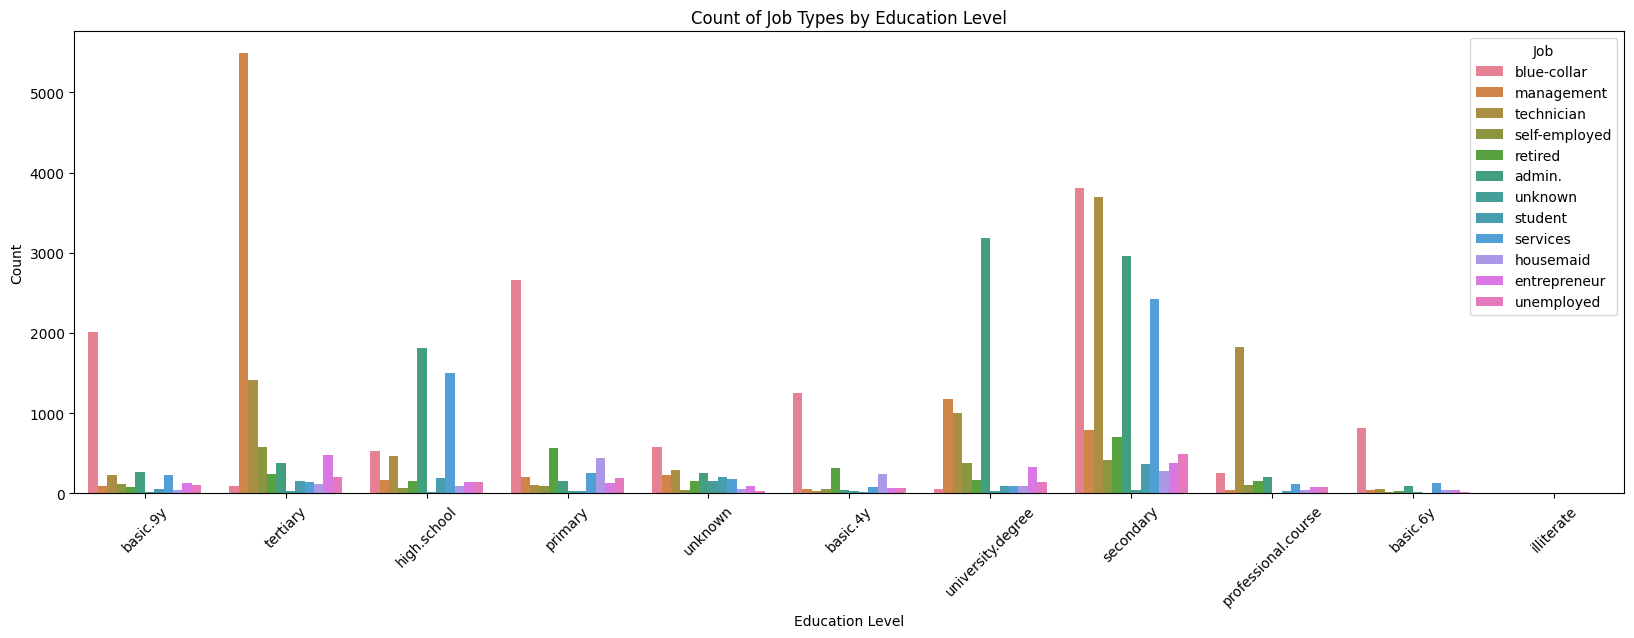

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='education', hue='job', data=train)
plt.title('Count of Job Types by Education Level')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Job')
plt.show()

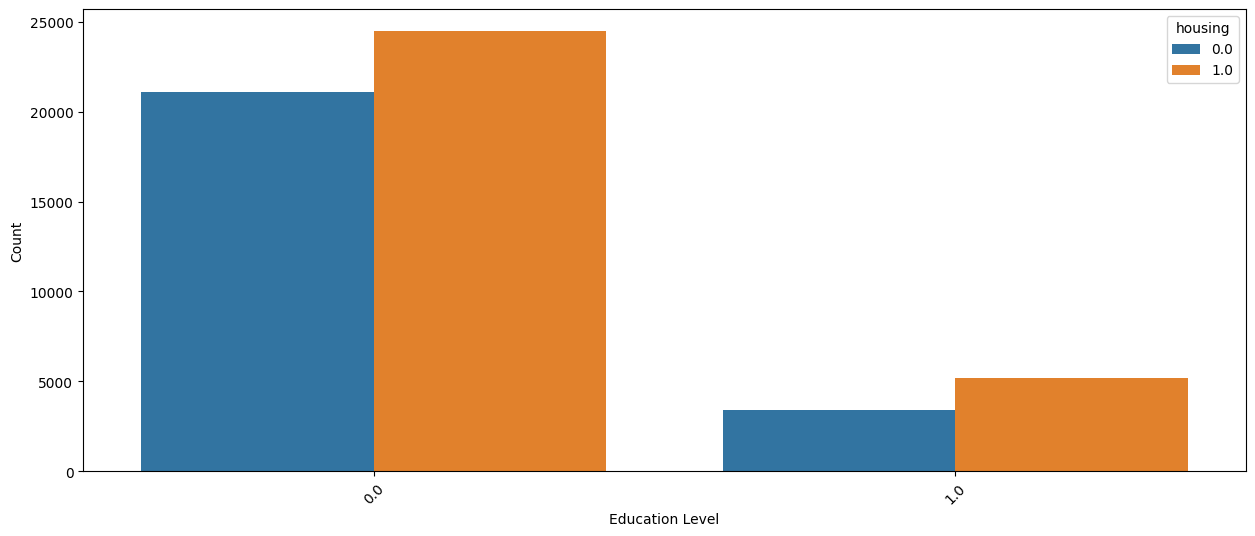

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='loan', hue='housing', data=train)
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
train['month'].value_counts()

month
may    9651
jul    4875
thu    4758
mon    4728
wed    4508
tue    4483
aug    4437
fri    4393
jun    3720
nov    2815
apr    2076
feb    1878
jan     972
oct     500
sep     432
mar     335
dec     151
Name: count, dtype: int64

In [ ]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]

def fix_swapped_values(row):
    day = row['day']
    month = row['month']

    if day in months and month in days:
        # Swap day and month
        row['day'], row['month'] = row['month'], row['day']
    return row

# Apply the function to each row
train= train.apply(fix_swapped_values, axis=1)
test= test.apply(fix_swapped_values, axis=1)

In [ ]:
days=['mon','tue','wed','thu','fri']
categorical_days = train[train['day'].isin(days)]

In [ ]:
categorical_days

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,0.0,NaN,0.0,1.0,cellular,fri,apr,583,2,999,1,failure,0
2,60854,17084,38,technician,single,high.school,0.0,NaN,0.0,0.0,cellular,wed,aug,74,2,999,0,nonexistent,0
4,73066,63978,54,self-employed,married,high.school,0.0,NaN,1.0,1.0,cellular,thu,aug,904,3,999,0,nonexistent,1
6,46946,77048,39,admin.,married,basic.9y,0.0,NaN,1.0,0.0,cellular,thu,may,279,1,999,0,nonexistent,0
9,70073,40530,34,unknown,divorced,basic.4y,0.0,NaN,0.0,0.0,cellular,wed,nov,73,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,52620,47584,53,self-employed,married,university.degree,0.0,NaN,1.0,0.0,telephone,wed,may,382,10,999,0,nonexistent,0
54704,48600,17064,59,retired,single,high.school,0.0,NaN,1.0,0.0,cellular,thu,jul,143,2,999,0,nonexistent,0
54705,55026,35438,27,technician,single,university.degree,0.0,NaN,1.0,0.0,cellular,mon,jul,258,3,999,0,nonexistent,0
54708,45891,4378,31,services,married,high.school,0.0,NaN,0.0,0.0,telephone,wed,may,636,6,999,0,nonexistent,0


In [ ]:
train['day'].value_counts()

day
thu    4758
mon    4728
wed    4508
tue    4483
fri    4393
20     1958
18     1603
21     1443
17     1374
6      1368
5      1337
8      1322
14     1303
7      1279
28     1268
29     1208
19     1202
15     1195
13     1117
30     1107
12     1104
9      1091
11     1078
4      1039
16      991
2       896
27      776
26      761
3       752
23      656
22      649
25      600
31      468
10      372
24      300
1       225
Name: count, dtype: int64

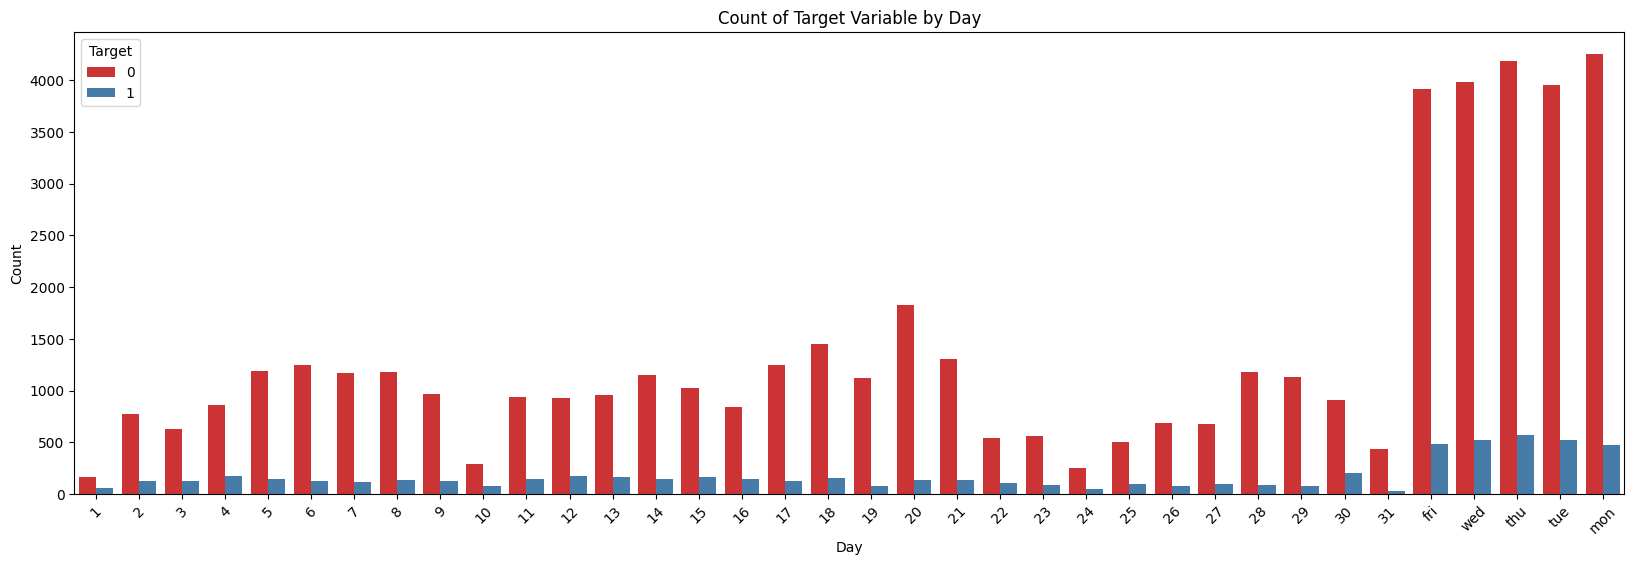

In [ ]:
day_counts = train.sort_values(by='day', key=lambda x: pd.to_numeric(x, errors='coerce'))

# Create the count plot
plt.figure(figsize=(20, 6))
sns.countplot(x='day', hue='Target',data=day_counts, palette='Set1')

plt.title('Count of Target Variable by Day')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [ ]:
mon_rows = train[train['day']=='mon']
sets = np.array_split(mon_rows, 4)

new_days = ['5','12','19','26']

for i, subset in enumerate(sets):
    subset['day'] = new_days[i]
    train.update(subset)

In [ ]:
thu_rows = train[train['day']=='thu']
thu_sets = np.array_split(thu_rows, 4)

thu_days = ['8','15','22','29']

for i, subset in enumerate(thu_sets):
    subset['day'] = thu_days[i]
    train.update(subset)

In [ ]:
wed_rows = train[train['day']=='wed']
wed_sets = np.array_split(wed_rows, 4)

wed_days = ['7','14','21','28']

for i, subset in enumerate(wed_sets):
    subset['day'] = wed_days[i]
    train.update(subset)

3,10,17,24,31 => Saturdays

4,11,18,25 => Sundays

5,12,19,26 => Mondays

6,13,20,27 => Tuesdays

7,14,21,28 => Wednesdays

8,15,22,29,2 => Thursdays

9,16,23,30,1 => Fridays

In [ ]:
tue_rows = train[train['day']=='tue']
tue_sets = np.array_split(tue_rows, 4)

tue_days = ['6','13','20','27']

for i, subset in enumerate(tue_sets):
    subset['day'] = tue_days[i]
    train.update(subset)

In [ ]:
fri_rows = train[train['day']=='fri']
fri_sets = np.array_split(fri_rows, 4)

fri_days = ['8','15','22','29']

for i, subset in enumerate(fri_sets):
    subset['day'] = fri_days[i]
    train.update(subset)

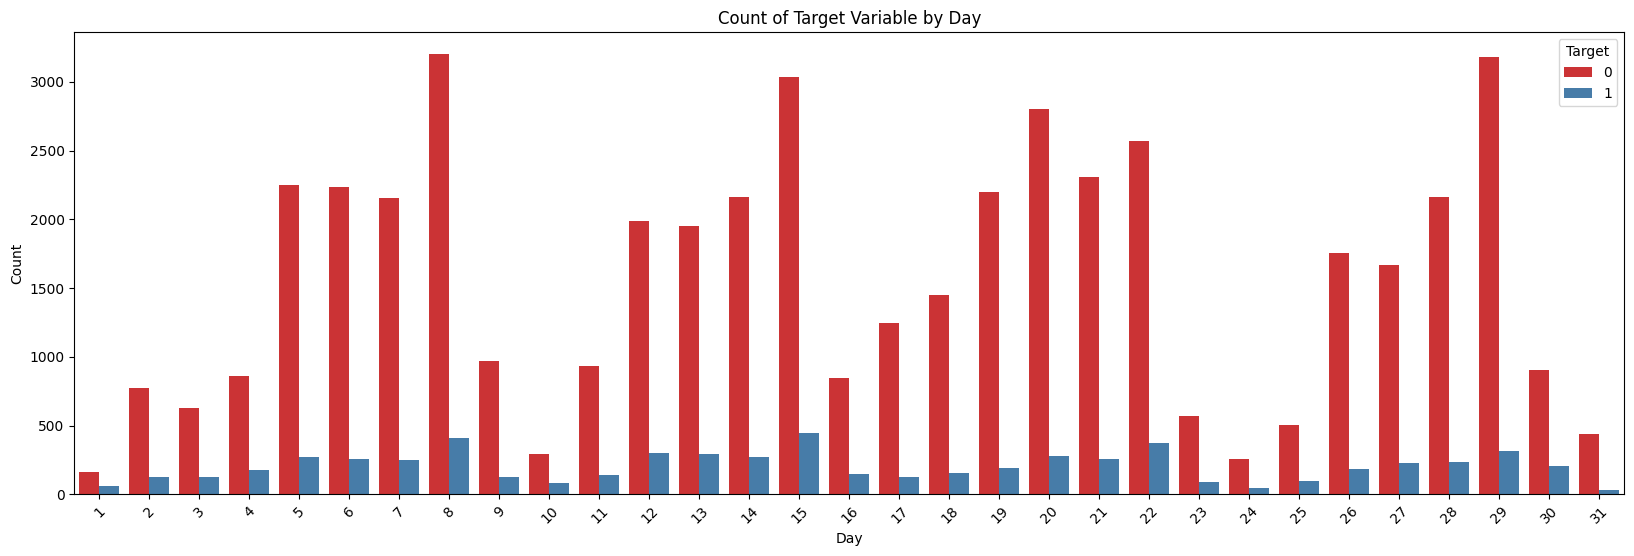

In [ ]:
day_counts = train.sort_values(by='day', key=lambda x: pd.to_numeric(x, errors='coerce'))

# Create the count plot
plt.figure(figsize=(20, 6))
sns.countplot(x='day', hue='Target',data=day_counts, palette='Set1')

plt.title('Count of Target Variable by Day')
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [ ]:
def update_day(data):
    for i in data['day']:
      if i == 'mon':
        sets = np.array_split(mon_rows, 4)
        new_days = ['5','12','19','26']
        for i, subset in enumerate(sets):
            subset['day'] = new_days[i]
            data.update(subset)

      elif i == 'tue':
          tue_sets = np.array_split(tue_rows, 4)

          tue_days = ['6','13','20','27']

          for i, subset in enumerate(tue_sets):
              subset['day'] = tue_days[i]
              data.update(subset)
      elif i == 'wed':
          wed_sets = np.array_split(wed_rows, 4)
          wed_days = ['7','14','21','28']
          for i, subset in enumerate(wed_sets):
              subset['day'] = wed_days[i]
              data.update(subset)

      elif i == 'thu':
          thu_sets = np.array_split(thu_rows, 4)
          thu_days = ['8','15','22','29']
          for i, subset in enumerate(thu_sets):
              subset['day'] = thu_days[i]
              data.update(subset)
      elif i == 'fri':
          fri_sets = np.array_split(fri_rows, 4)
          fri_days = ['9','16','23','30']
          for i, subset in enumerate(fri_sets):
              subset['day'] = fri_days[i]
              data.update(subset)



update_day(test)

In [ ]:
test['day'].value_counts()

day
29    1543
8     1528
15    1515
20    1284
22    1263
5     1094
21    1085
19    1076
28    1063
6     1055
14    1047
7     1040
12    1020
13     958
27     835
26     795
18     705
17     565
9      470
30     459
16     424
4      406
11     401
2      397
3      327
23     283
25     240
31     175
10     152
24     147
1       97
Name: count, dtype: int64

In [ ]:
train['day'] = train['day'].astype(int)


ValueError: invalid literal for int() with base 10: 'fri'

In [ ]:
# 3,10,17,24,31 => Saturdays
# 4,11,18,25 => Sundays
# 5,12,19,26 => Mondays
# 6,13,20,27 => Tuesdays
# 7,14,21,28 => Wednesdays
# 8,15,22,29,2 => Thursdays
# 9,16,23,30,1 => Fridays


# def mapping_days(data):
#   for i in data['day']:
#     if data['day']=='mon':


In [ ]:
test.isnull().sum()

In [ ]:
colors = ['burlywood', 'hotpink', 'olive',  'teal', 'orange', 'green', 'red']

test_numerical_features = test.select_dtypes(include=['int64', 'float64'])
for i, col in enumerate(test_numerical_features.columns):
    fig = go.Figure()

    # Plot the histogram of non-NaN values
    fig.add_trace(go.Histogram(x = test[col].dropna(), marker=dict(color=colors[i % len(colors)]), name='Non-NaN'))

    # Add a bar for NaN values
    num_nans = test[col].isna().sum()
    if num_nans > 0:
        fig.add_trace(go.Bar(

            x=[test[col].min() - 1],
            y=[num_nans],
            marker=dict(color='black'),
            width=[10],
            name=f'NaN (count={num_nans})'
        ))

    fig.update_layout(
        title=f"Distribution of {col} (including NaN values)",
        xaxis_title=col,
        yaxis_title='Count',
        bargap=0.2,
        xaxis=dict(tickangle=45),
        legend=dict(title='Legend'),
        width=800,
        height=400
    )

    # Summary statistics
    summary_stats = test[col].describe()
    summary_stats_html = summary_stats.to_frame().to_html()

    # Combine plot and summary statistics
    display(HTML(f"""
    <div style="display: flex; align-items: flex-start;">
        <div>{fig.to_html(full_html=False, include_plotlyjs='cdn')}</div>
        <div style="padding-left: 50px;">
            <h4>Summary Statistics for {col}</h4>
            {summary_stats_html}
            <p>Number of NaN values in {col}: {num_nans}</p>
        </div>
    </div>
    """))


In [ ]:
train['education'].value_counts()

In [ ]:
train['job'].value_counts()

In [ ]:
print('1º Quartile: ', train['age'].quantile(q = 0.25))
print('2º Quartile: ', train['age'].quantile(q = 0.50))
print('3º Quartile: ', train['age'].quantile(q = 0.75))
print('4º Quartile: ', train['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Ages above: ', train['age'].quantile(q = 0.75) +
                      1.5*(train['age'].quantile(q = 0.75) - train['age'].quantile(q = 0.25)), 'are outliers')

In [ ]:
print('Numerber of outliers: ', train[train['age'] > 72.0]['age'].count())
print('Number of data: ', len(train))
#Outliers in %
print('Outliers are:', round(train[train['age'] > 72.0]['age'].count()*100/len(train),2), '%')

In [ ]:
# Quartiles
print('1º Quartile: ', train['duration'].quantile(q = 0.25))
print('2º Quartile: ', train['duration'].quantile(q = 0.50))
print('3º Quartile: ', train['duration'].quantile(q = 0.75))
print('4º Quartile: ', train['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
out_layers_duration =train['duration'].quantile(q = 0.75) + 1.5*(train['duration'].quantile(q = 0.75) - train['duration'].quantile(q = 0.25))
print('\nDuration calls above: ',out_layers_duration , 'are outliers')
print('Numerber of outliers: ', train[train['duration'] > out_layers_duration]['duration'].count())
print('Number of clients: ', len(train))
#Outliers in %
print('Outliers are:', round(train[train['duration'] > 644.5]['duration'].count()*100/len(train),2), '%')

In [ ]:
train.info()

In [ ]:
numfeatures = train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 7))
sns.heatmap(numfeatures.corr(), cmap='Pastel2',annot = True, vmin = -1, vmax = 1, linewidths=2)
plt.show()

In [ ]:
import plotly.graph_objects as go
numerical_cols = train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a DataFrame for the table
table_data = pd.DataFrame({
    'Numerical Features': pd.Series(numerical_cols),
    'Categorical Features': pd.Series(categorical_cols)
})

# Creating a table with Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(table_data.columns),
                fill_color='lightblue',
                align='center'),
    cells=dict(values=[table_data['Numerical Features'], table_data['Categorical Features']],
               fill_color='white',
               align='center'))
])

# Displaying the table
fig.show()